In [9]:
!pip install torch-geometric
!pip install torch==2.6.0+cu118 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.6.0+cu118.html
!pip install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu118.html
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)

   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ---

In [10]:
from class_gnn import TorsoGCNv1, TorsoGCNv2, TorsoGCNv3

In [11]:
import torch 

from class_gnn import TorsoGCNv1, TorsoGCNv2, TorsoGCNv3
from utils_graph import visualize_graph_2d, tensor_batch_to_graphs




In [16]:


xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]]], device='cuda') # Batch di 2 tensori su CUDA


xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]]], device='cuda') # Batch di 2 tensori su CUDA


xx_batch = torch.tensor([[[[[1., 0.],
                             [1., 0.]],

                            [[1., 0.],
                             [0., 1.]]]]], device='cuda')  # Batch di 1 tensore su CUDA




In [23]:
xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]],
                     
                     
                     
                     [[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 1.,  0.,  0.,  2.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  2.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  2.,  0.],
                      [ 0.,  2.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  3.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  -1.,  -1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  1.,  0.,  0.],
                     [ 0.,  0.,  0.,  1.]],

                    [[ 1.,  0.,  0.,  0.],
                     [ 0.,  0.,  1.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  1.,  0.,  0.]],

                    [[ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  3.,  0.],
                     [ 0.,  0.,  0.,  0.]],

                    [[ 0.,  0.,  0.,  0.],
                     [ 0.,  2.,  0.,  0.],
                     [ 0.,  0.,  0.,  0.],
                     [ 0.,  0.,  0.,  1.]]]]], device='cuda') # 2 Batch di 2 tensori su CUDA

print(xx_batch.shape)  # Verifica la forma del tensore


torch.Size([2, 2, 4, 4, 4])


In [37]:
xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]],


                   [[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  1.,  1.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 1.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  -1.],
                      [ 0.,  0.,  0.,  0.],
                      [ -1.,  0.,  0.,  1.]]]]], device='cuda') # 1 Batch di 2 tensori su CUDA

print(xx_batch.shape)  # Verifica la forma del tensore

torch.Size([1, 2, 4, 4, 4])


In [19]:
xx_batch = torch.tensor([[[[[1., 0.],
                             [0., 1.]],

                            [[0., 0.],
                             [1., 0.]]],

                           [[[1., 0.],
                             [0., 1.]],

                            [[1., 0.],
                             [0., 1.]]]]], device='cuda')  # Batch di 1 tensore su CUDA

print(xx_batch.shape)  # Verifica la forma del tensore

torch.Size([1, 2, 2, 2, 2])


In [39]:
xx_batch = torch.tensor([[[[[ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 1.,  0.,  0.,  0.],
                      [ 0.,  1.,  0.,  0.]],

                    [ [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.]],

                    [ [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  0.,  0.],
                      [ 0.,  0.,  1.,  0.],
                      [ 0.,  0.,  0.,  1.]]]]]) #batch di 1 tensore 

In [ ]:
graph_batch = tensor_batch_to_graphs(xx_batch, True)
visualize_graph_2d(graph_batch)

In [9]:
graph_batch = tensor_batch_to_graphs(xx_batch, False)
print(type(graph_batch))  # Controlla il tipo dell'oggetto restituito
print(graph_batch)  # Stampa l'oggetto per vedere cosa contiene
print(graph_batch.num_graphs)  # Numero di grafi nel batch
print(graph_batch.x.shape if hasattr(graph_batch, "x") else "No x attribute")
print(graph_batch.edge_index.shape if hasattr(graph_batch, "edge_index") else "No edge_index attribute")


1
<class 'abc.DataBatch'>
DataBatch(edge_index=[2, 16], i=[5], j=[5], k=[5], values=[5, 2], num_nodes=5, edge_attr=[16, 1], x=[5, 5], batch=[5], ptr=[2])
1
torch.Size([5, 5])
torch.Size([2, 16])


In [10]:
print(f"edge_attr: {graph_batch.edge_attr.shape if hasattr(graph_batch, 'edge_attr') else 'None'}")
print(graph_batch.edge_attr)

edge_attr: torch.Size([16, 1])
tensor([[0.5000],
        [1.0000],
        [1.0000],
        [0.5000],
        [0.5000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.5000],
        [1.0000],
        [0.5000],
        [1.0000],
        [0.5000],
        [1.0000],
        [0.5000],
        [0.5000]], device='cuda:0')


In [11]:
model = TorsoGCNv1(input_dim=5, hidden_dim=128, S=xx_batch.shape[-1], c=8).cuda()
embedding = model(xx_batch) #ATTENZIONE, QUI DEVI DARE IL TENSORE PERCHè NEL FORWARD CONVERTE GIà IN GRAFO
print(embedding.shape)  # Output atteso: torch.Size([batch_size, 48, 8]) -> se batch_size=2 torch.Size([2, 48, 8])

1
x: tensor([[0., 0., 0., 1., 1.],
        [0., 1., 1., 1., 1.],
        [1., 0., 0., 0., 1.],
        [1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 1.]], device='cuda:0')
edge_index: torch.Size([2, 16])
edge_attr: torch.Size([16, 1])
batch: tensor([0, 0, 0, 0, 0], device='cuda:0')
torch.Size([1, 12, 8])


In [12]:
model = TorsoGCNv2(input_dim=5, hidden_dim=128, S=xx_batch.shape[-1], c=8).cuda()
embedding = model(xx_batch) #ATTENZIONE, QUI DEVI DARE IL TENSORE PERCHè NEL FORWARD CONVERTE GIà IN GRAFO
print(embedding.shape)  # Output atteso: torch.Size([batch_size, 48, 8]) -> se batch_size=2 torch.Size([2, 48, 8])

1
x: tensor([[0., 0., 0., 1., 1.],
        [0., 1., 1., 1., 1.],
        [1., 0., 0., 0., 1.],
        [1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 1.]], device='cuda:0')
edge_index: torch.Size([2, 16])
edge_attr: torch.Size([16, 1])
batch: tensor([0, 0, 0, 0, 0], device='cuda:0')
edge_weights =  tensor([0.5000, 1.0000, 1.0000, 0.5000, 0.5000, 1.0000, 1.0000, 1.0000, 0.5000,
        1.0000, 0.5000, 1.0000, 0.5000, 1.0000, 0.5000, 0.5000],
       device='cuda:0')
edge_weights.shape:  torch.Size([16])
edge_index.shape:  torch.Size([2, 16])
torch.Size([1, 12, 8])


1


TypeError: unsupported format string passed to list.__format__

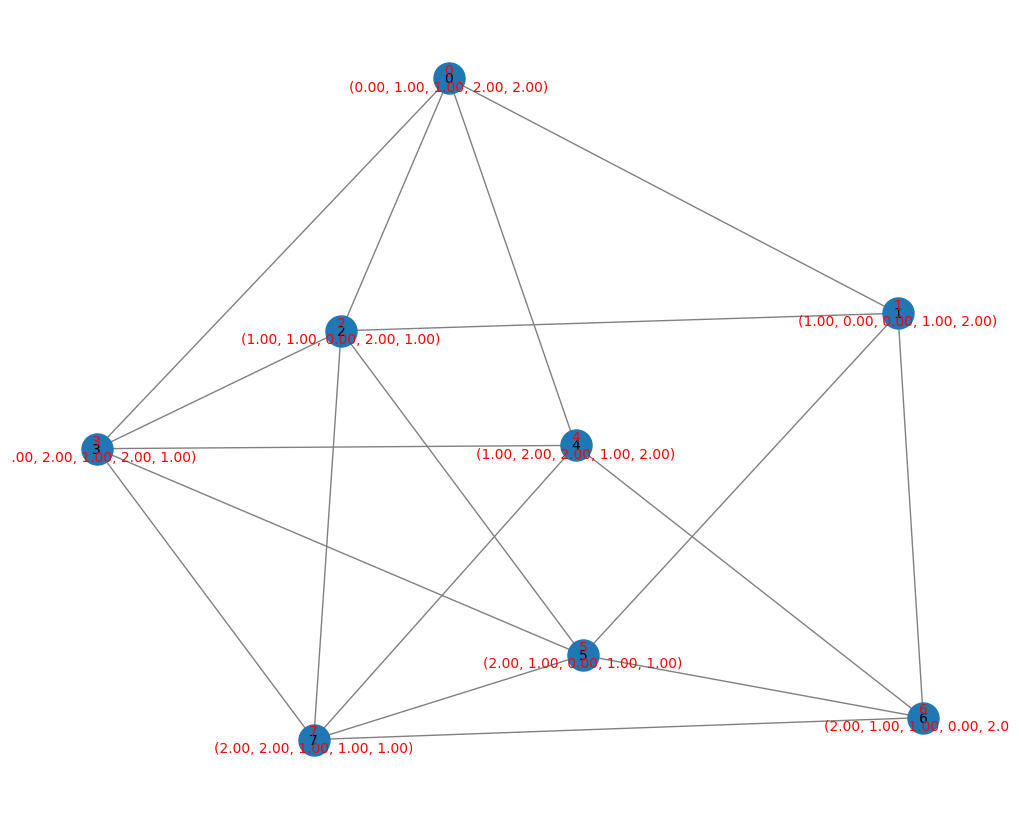

In [13]:
line_graph = tensor_batch_to_graphs(xx_batch, True)
visualize_graph_2d(line_graph)

In [ ]:
print(f"x: {graph_batch.x if graph_batch.x is not None else 'None'}")
print(f"edge_index: {graph_batch.edge_index.shape if graph_batch.edge_index is not None else 'None'}")

In [ ]:
print(f"edge_attr: {line_graph.edge_attr.shape if hasattr(line_graph, 'edge_attr') else 'None'}")
print(line_graph.edge_attr)


In [ ]:
model = TorsoGCNv3(input_dim=5, hidden_dim=128, S=xx_batch.shape[-1], c=8).cuda()
embedding = model(xx_batch) #ATTENZIONE, QUI DEVI DARE IL TENSORE PERCHè NEL FORWARD CONVERTE GIà IN GRAFO
print(embedding.shape)  # Output atteso: torch.Size([batch_size, 48, 8]) -> se batch_size=2 torch.Size([2, 48, 8])